# Aviation Accident Analysis

# Business Understanding

The company is planning to diversify by purchasing and operating airplanes for commercial and private enterprises. The Head of Aviation has little knowledge of the risk it imposes and will use the insights from this analysis to decide which aircraft to purchase. I will analyze a dataset from the National Transportation Safety Board to determine the safety of plane types and provide multiple suggestions 
to the Head of Aviation.

# Data Understanding

The dataset used for this analysis is provided by the National Transportation Safety Board. It includes civil aviation accidents and other selected incidents from 1962 to 2023. This step is focused on understanding what is in the dataset so it can be further analyzed to answer the business question.

Each record of this dataset represents an aviation accident, marked by the "Event ID", with information about the plane (make, model, etc.) and the severity of the accident (# of injuries).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#import aviation and us stat code csv files
aviation_df = pd.read_csv('./data/AviationData.csv', encoding='latin-1')
us_state_df = pd.read_csv('./data/USState_Codes.csv', encoding='latin-1')

/var/folders/sk/8hr8rsms4cb5y3ryy9w5yplh0000gn/T/ipykernel_90001/3088602378.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation_df = pd.read_csv('./data/AviationData.csv', encoding='latin-1')


In [3]:
#Print first few rows of the dataframes
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
us_state_df.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [5]:
#Print the shape of aviation_df
aviation_df.shape

(88889, 31)

In [6]:
#Print what data type is in each column
aviation_df.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [7]:
#print general information of aviation_df
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [8]:
#Print the percentage of data missing in each column
round(aviation_df.isna().sum()/ aviation_df.shape[0] * 100, 1)

Event.Id                   0.0
Investigation.Type         0.0
Accident.Number            0.0
Event.Date                 0.0
Location                   0.1
Country                    0.3
Latitude                  61.3
Longitude                 61.3
Airport.Code              43.6
Airport.Name              40.7
Injury.Severity            1.1
Aircraft.damage            3.6
Aircraft.Category         63.7
Registration.Number        1.6
Make                       0.1
Model                      0.1
Amateur.Built              0.1
Number.of.Engines          6.8
Engine.Type                8.0
FAR.Description           64.0
Schedule                  85.8
Purpose.of.flight          7.0
Air.carrier               81.3
Total.Fatal.Injuries      12.8
Total.Serious.Injuries    14.1
Total.Minor.Injuries      13.4
Total.Uninjured            6.7
Weather.Condition          5.1
Broad.phase.of.flight     30.6
Report.Status              7.2
Publication.Date          15.5
dtype: float64

There are multiple columns with over 50% of it is missing data. The Latitude, Longitude, Aircraft Category, FAR Description, Schedule and Air Carrier columns may not be useful to use in this analysis due to the large amount of missing data

In [9]:
#Check different Make of Airplanes
aviation_df['Make'].value_counts()

Make
Cessna             22227
Piper              12029
CESSNA              4922
Beech               4330
PIPER               2841
                   ...  
Leonard Walters        1
Maule Air Inc.         1
Motley Vans            1
Perlick                1
ROYSE RALPH L          1
Name: count, Length: 8237, dtype: int64

In [10]:
#Check different phases of flight when accident occured
aviation_df['Broad.phase.of.flight'].value_counts()

Broad.phase.of.flight
Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: count, dtype: int64

In [11]:
#Check for duplicats in the dataframe
aviation_df[aviation_df.duplicated()]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date


In [12]:
#Checking for any extraneous values that may be used to replace missing data
for col in aviation_df.columns:
    print(col, '\n', aviation_df[col].value_counts(normalize=True).head(), '\n\n')

Event.Id 
 Event.Id
20001212X19172    0.000034
20001214X45071    0.000034
20220730105623    0.000022
20051213X01965    0.000022
20001212X16765    0.000022
Name: proportion, dtype: float64 


Investigation.Type 
 Investigation.Type
Accident    0.956418
Incident    0.043582
Name: proportion, dtype: float64 


Accident.Number 
 Accident.Number
CEN22LA149    0.000022
WPR23LA041    0.000022
WPR23LA045    0.000022
DCA22WA214    0.000022
DCA22WA089    0.000022
Name: proportion, dtype: float64 


Event.Date 
 Event.Date
1984-06-30    0.000281
1982-05-16    0.000281
2000-07-08    0.000281
1983-08-05    0.000270
1984-08-25    0.000270
Name: proportion, dtype: float64 


Location 
 Location
ANCHORAGE, AK      0.004885
MIAMI, FL          0.002251
ALBUQUERQUE, NM    0.002206
HOUSTON, TX        0.002173
CHICAGO, IL        0.002071
Name: proportion, dtype: float64 


Country 
 Country
United States     0.927647
Brazil            0.004218
Canada            0.004049
Mexico            0.004038
United Ki

## Data Preparation

The aviation data set needs to be cleaned and organized so that the analysis will produce clear and accurate results. This includes dropping unnecessary columns from the dataset, dropping appropriate rows, and reformatting data. 

The "Make" column needs to be normalized, so there are no repeat values with different formats.



In [13]:
#Normalize "Make" Column Data
aviation_df['Make'] = aviation_df['Make'].str.lower().str.title()
aviation_df['Make'].value_counts()

Make
Cessna           27149
Piper            14870
Beech             5372
Boeing            2745
Bell              2722
                 ...  
Cohen                1
Kitchens             1
Lutes                1
Izatt                1
Royse Ralph L        1
Name: count, Length: 7587, dtype: int64

In [14]:
#Reformat Column Names to remove periods between words
aviation_df.columns = aviation_df.columns.str.replace('.', ' ').str.title()

In [15]:
aviation_df.columns

Index(['Event Id', 'Investigation Type', 'Accident Number', 'Event Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport Code',
       'Airport Name', 'Injury Severity', 'Aircraft Damage',
       'Aircraft Category', 'Registration Number', 'Make', 'Model',
       'Amateur Built', 'Number Of Engines', 'Engine Type', 'Far Description',
       'Schedule', 'Purpose Of Flight', 'Air Carrier', 'Total Fatal Injuries',
       'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured',
       'Weather Condition', 'Broad Phase Of Flight', 'Report Status',
       'Publication Date'],
      dtype='object')

The dataset includes incidents from 60 years ago, but this date range is too far back. Accidents from the 60's and 70's are interesting to know about, but those types of planes will not be purchased due to the age of the planes. The dataset will be sorted to only include incidents within the past 30 years to have a better understanding of the safety of more current planes.

In [16]:
#Convert Event Date to datetime object
aviation_df['Event Date'] = pd.to_datetime(aviation_df['Event Date'])
print(type(aviation_df['Event Date'][0]))

recent_aviation_df = aviation_df[aviation_df['Event Date'] > '1993-01-01']
recent_aviation_df.head()

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,...,Purpose Of Flight,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase Of Flight,Report Status,Publication Date
32031,20001211X11743,Accident,MIA93WA043,1993-01-02,"BIMINI, Bahamas",Bahamas,NaN,NaN,NaN,NaN,...,Positioning,NaN,0.0,0.0,0.0,1.0,VMC,NaN,Foreign,16-03-1995
32032,20001211X11731,Incident,MIA93IA052,1993-01-02,"ORLANDO, FL",United States,NaN,NaN,NaN,NaN,...,Unknown,NaN,0.0,0.0,1.0,2.0,VMC,Landing,Probable Cause,10-02-1994
32033,20001211X11684,Accident,CHI93MA061,1993-01-02,"HIBBING, MN",United States,NaN,NaN,HIB,HIBBING-CHISHOLM,...,Unknown,Express I (dba: Northwest Airlink),0.0,0.0,0.0,31.0,IMC,Landing,Probable Cause,21-04-1994
32034,20001211X11713,Accident,LAX93LA089,1993-01-02,"GORMAN, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,2.0,0.0,VMC,Cruise,Probable Cause,15-11-1993
32035,20001211X11712,Accident,LAX93LA088,1993-01-02,"CONCORD, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,1.0,0.0,VMC,Cruise,Probable Cause,15-11-1993


In [17]:
recent_aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56858 entries, 32031 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event Id                56858 non-null  object        
 1   Investigation Type      56858 non-null  object        
 2   Accident Number         56858 non-null  object        
 3   Event Date              56858 non-null  datetime64[ns]
 4   Location                56817 non-null  object        
 5   Country                 56785 non-null  object        
 6   Latitude                34373 non-null  object        
 7   Longitude               34364 non-null  object        
 8   Airport Code            33300 non-null  object        
 9   Airport Name            34080 non-null  object        
 10  Injury Severity         55858 non-null  object        
 11  Aircraft Damage         54360 non-null  object        
 12  Aircraft Category       28615 non-null  object 

In [18]:
#Replace null values in 'Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries', and 'Total Uninjured' columns with respective median values. 

#recent_aviation_df['Total Fatal Injuries'].fillna(recent_aviation_df['Total Fatal Injuries'].median())
#recent_aviation_df['Total Serious Injuries'].fillna(recent_aviation_df['Total Serious Injuries'].median())
#recent_aviation_df['Total Minor Injuries'].fillna(recent_aviation_df['Total Minor Injuries'].median())
#recent_aviation_df['Total Uninjured'].fillna(recent_aviation_df['Total Uninjured'].median());


In [19]:
recent_aviation_df.dropna(axis = 0, subset = ['Total Fatal Injuries', 'Total Serious Injuries',\
                                              'Total Minor Injuries', 'Total Uninjured'],\
                                    inplace = True)


/var/folders/sk/8hr8rsms4cb5y3ryy9w5yplh0000gn/T/ipykernel_90001/3711825505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_aviation_df.dropna(axis = 0, subset = ['Total Fatal Injuries', 'Total Serious Injuries',\


In [20]:
recent_aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42582 entries, 32031 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event Id                42582 non-null  object        
 1   Investigation Type      42582 non-null  object        
 2   Accident Number         42582 non-null  object        
 3   Event Date              42582 non-null  datetime64[ns]
 4   Location                42561 non-null  object        
 5   Country                 42518 non-null  object        
 6   Latitude                22625 non-null  object        
 7   Longitude               22626 non-null  object        
 8   Airport Code            24866 non-null  object        
 9   Airport Name            25461 non-null  object        
 10  Injury Severity         41582 non-null  object        
 11  Aircraft Damage         40585 non-null  object        
 12  Aircraft Category       24673 non-null  object 

In [42]:
recent_aviation_df['Make/Model'] = recent_aviation_df['Make'] + ' - ' + recent_aviation_df['Model']
recent_aviation_df['Make/Model'].value_counts()[0:10]

/var/folders/sk/8hr8rsms4cb5y3ryy9w5yplh0000gn/T/ipykernel_90001/1814300513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_aviation_df['Make/Model'] = recent_aviation_df['Make'] + ' - ' + recent_aviation_df['Model']


Make/Model
Cessna - 172         978
Cessna - 152         791
Cessna - 172N        480
Boeing - 737         474
Cessna - 182         367
Piper - PA-28-140    354
Cessna - 172M        343
Cessna - 150         310
Cessna - 180         298
Piper - PA28         278
Name: count, dtype: int64

# Exploratory Data Analysis

In [45]:
#Average Number of Fatal Injuries per Accident for Top Manufacturers 
injuries = recent_aviation_df.groupby('Make')\
            [['Total Fatal Injuries','Total Serious Injuries','Total Minor Injuries','Total Uninjured']].agg(['mean','sum'])
top_injuries = injuries.sort_values(('Total Fatal Injuries','sum'), ascending = False)[0:10]
top_injuries

Total Fatal Injuries         Total Serious Injuries          \
                                  mean     sum                   mean     sum   
Make                                                                            
Cessna                        0.355676  4123.0               0.208592  2418.0   
Boeing                        2.431624  3983.0               0.928571  1521.0   
Piper                         0.445112  2891.0               0.215550  1400.0   
Beech                         0.727159  1743.0               0.233208   559.0   
Airbus                        4.439560  1212.0               0.699634   191.0   
Bell                          0.585851   737.0               0.322734   406.0   
Robinson                      0.622366   384.0               0.207455   128.0   
Douglas                       2.854701   334.0               0.512821    60.0   
Airbus Industrie              4.700000   329.0               0.657143    46.0   
Mcdonnell Douglas             1.162879   307.0               0.821970   217.0   

                  Total Minor Injuries         Total Uninjured            
                                  mean     sum            mean       sum  
Make                                                                      
Cessna                        0.220928  2561.0        1.244565   14427.0  
Boeing                        0.716728  1174.0       73.219170  119933.0  
Piper                         0.226482  1471.0        1.133025    7359.0  
Beech                         0.241969   580.0        1.377555    3302.0  
Airbus                        0.293040    80.0       69.465201   18964.0  
Bell                          0.339428   427.0        1.039746    1308.0  
Robinson                      0.257699   159.0        0.795786     491.0  
Douglas                       0.717949    84.0       19.743590    2310.0  
Airbus Industrie              2.271429   159.0      131.900000    9233.0  
Mcdonnell Douglas             2.026515   535.0       64.053030   16910.0

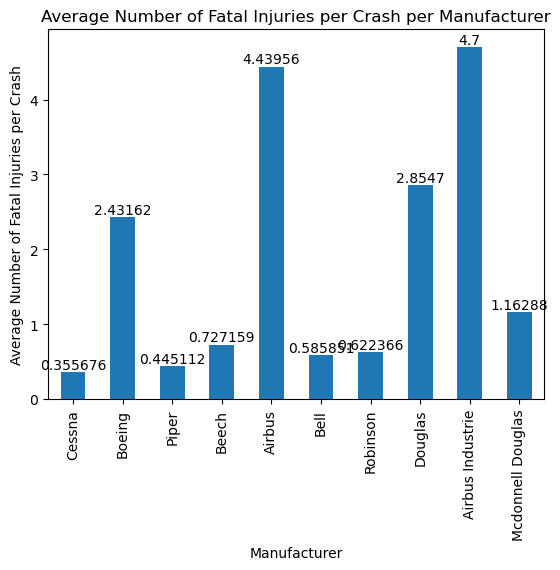

In [22]:
ax = top_injuries.plot.bar(y=('Total Fatal Injuries','mean'),\
                     legend = False,\
                     xlabel = 'Manufacturer',\
                     ylabel = 'Average Number of Fatal Injuries per Crash',\
                     title = 'Average Number of Fatal Injuries per Crash per Manufacturer',\
                     );

ax.bar_label(ax.containers[0]);

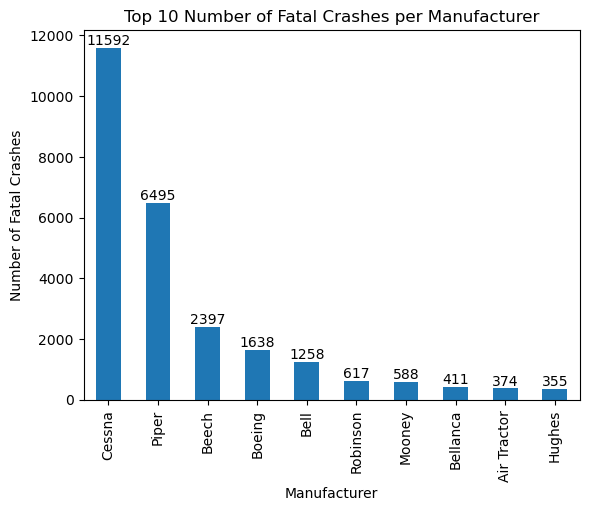

In [23]:
#Which Manufacturer has the most number of fatal crashes
num_fatal_acc = recent_aviation_df.groupby('Make')['Total Fatal Injuries'].count().sort_values(ascending = False)[0:10]

ax = num_fatal_acc.plot.bar(title = 'Top 10 Number of Fatal Crashes per Manufacturer',\
                       xlabel = 'Manufacturer',\
                       ylabel = 'Number of Fatal Crashes');
ax.bar_label(ax.containers[0]);

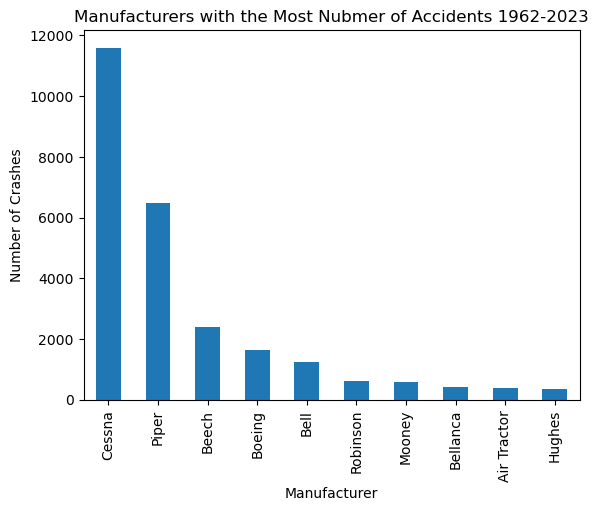

In [24]:
#Which Manufacturer has the most number of fatal crashes
num_acc = recent_aviation_df['Make'].value_counts()[0:10]

num_acc.plot.bar(title = 'Manufacturers with the Most Nubmer of Accidents 1962-2023',\
                       xlabel = 'Manufacturer',\
                       ylabel = 'Number of Crashes');

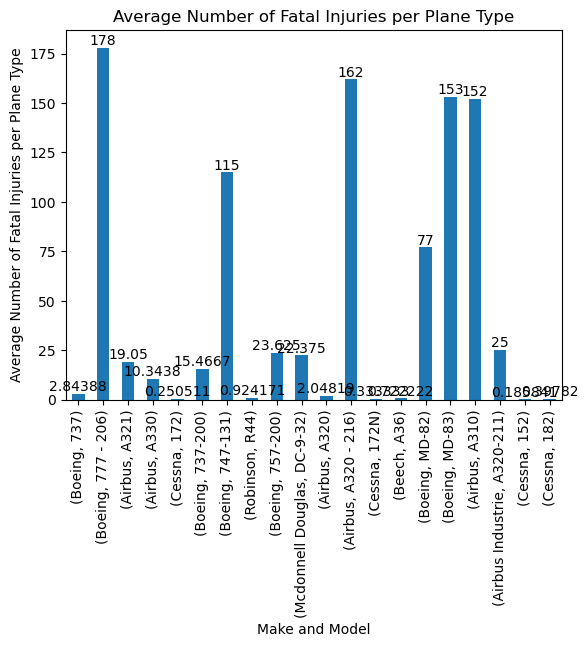

In [25]:
injuries_make_model = recent_aviation_df.groupby(['Make','Model'])\
            [['Total Fatal Injuries','Total Serious Injuries','Total Minor Injuries','Total Uninjured']].agg(['mean','sum','count'])
top_injuries_make_model = injuries_make_model.sort_values(('Total Fatal Injuries','sum'), ascending = False)[0:20]
ax = top_injuries_make_model.plot.bar(y=('Total Fatal Injuries','mean'),\
                     legend = False,\
                     xlabel = 'Make and Model',\
                     ylabel = 'Average Number of Fatal Injuries per Plane Type',\
                     title = 'Average Number of Fatal Injuries per Plane Type',\
                     )
ax.bar_label(ax.containers[0]);

In [58]:
most_injuries_make_model = injuries_make_model.sort_values(('Total Fatal Injuries','sum'), ascending = False)[0:20]

def rate(injury):
    most_injuries_make_model[f'{injury} Rate'] = most_injuries_make_model[(injury,'sum')] / \
                                                most_injuries_make_model[(injury,'count')]
rate('Total Fatal Injuries')
rate('Total Serious Injuries')
rate('Total Minor Injuries')
rate('Total Uninjured')

most_injuries_make_model

Total Fatal Injuries                \
                                             mean     sum count   
Make              Model                                           
Boeing            737                    2.843882  1348.0   474   
                  777 - 206            178.000000   534.0     3   
Airbus            A321                  19.050000   381.0    20   
                  A330                  10.343750   331.0    32   
Cessna            172                    0.250511   245.0   978   
Boeing            737-200               15.466667   232.0    15   
                  747-131              115.000000   230.0     2   
Robinson          R44                    0.924171   195.0   211   
Boeing            757-200               23.625000   189.0     8   
Mcdonnell Douglas DC-9-32               22.375000   179.0     8   
Airbus            A320                   2.048193   170.0    83   
                  A320 - 216           162.000000   162.0     1   
Cessna            172N                   0.333333   160.0   480   
Beech             A36                    0.722222   156.0   216   
Boeing            MD-82                 77.000000   154.0     2   
                  MD-83                153.000000   153.0     1   
Airbus            A310                 152.000000   152.0     1   
Airbus Industrie  A320-211              25.000000   150.0     6   
Cessna            152                    0.185841   147.0   791   
                  182                    0.397820   146.0   367   

                             Total Serious Injuries               \
                                               mean    sum count   
Make              Model                                            
Boeing            737                      0.810127  384.0   474   
                  777 - 206                0.000000    0.0     3   
Airbus            A321                     0.000000    0.0    20   
                  A330                     0.593750   19.0    32   
Cessna            172                      0.218814  214.0   978   
Boeing            737-200                  0.333333    5.0    15   
                  747-131                  0.000000    0.0     2   
Robinson          R44                      0.293839   62.0   211   
Boeing            757-200                  1.250000   10.0     8   
Mcdonnell Douglas DC-9-32                  0.000000    0.0     8   
Airbus            A320                     0.120482   10.0    83   
                  A320 - 216               0.000000    0.0     1   
Cessna            172N                     0.233333  112.0   480   
Beech             A36                      0.291667   63.0   216   
Boeing            MD-82                    0.000000    0.0     2   
                  MD-83                    0.000000    0.0     1   
Airbus            A310                     0.000000    0.0     1   
Airbus Industrie  A320-211                 0.000000    0.0     6   
Cessna            152                      0.103666   82.0   791   
                  182                      0.245232   90.0   367   

                             Total Minor Injuries               \
                                             mean    sum count   
Make              Model                                          
Boeing            737                    0.177215   84.0   474   
                  777 - 206              0.000000    0.0     3   
Airbus            A321                   0.100000    2.0    20   
                  A330                   0.750000   24.0    32   
Cessna            172                    0.178937  175.0   978   
Boeing            737-200                3.133333   47.0    15   
                  747-131                0.000000    0.0     2   
Robinson          R44                    0.279621   59.0   211   
Boeing            757-200                0.000000    0.0     8   
Mcdonnell Douglas DC-9-32                1.500000   12.0     8   
Airbus            A320                   0.156627   13.0    83  

In [37]:
boeing_injuries = injuries_make_model.loc['Boeing'].sort_values(('Total Fatal Injuries','mean'), ascending = False)[0:10]
boeing_injuries

Total Fatal Injuries              Total Serious Injuries        \
                          mean    sum count                   mean   sum   
Model                                                                      
777 - 206                178.0  534.0     3                    0.0   0.0   
MD-83                    153.0  153.0     1                    0.0   0.0   
-737-222                 123.0  123.0     1                    0.0   0.0   
747-131                  115.0  230.0     2                    0.0   0.0   
MD-82                     77.0  154.0     2                    0.0   0.0   
B-757-23A                 70.0   70.0     1                    0.0   0.0   
B-737-300                 66.0  132.0     2                    0.0   0.0   
737 - 500                 50.0   50.0     1                    0.0   0.0   
B-737-200                 36.0   72.0     2                    2.5   5.0   
707-323                   34.0   34.0     1                   50.0  50.0   

                Total Minor Injuries             Total Uninjured               
          count                 mean   sum count            mean    sum count  
Model                                                                          
777 - 206     3                  0.0   0.0     3             0.0    0.0     3  
MD-83         1                  0.0   0.0     1             0.0    0.0     1  
-737-222      1                  0.0   0.0     1             0.0    0.0     1  
747-131       2                  0.0   0.0     2            94.5  189.0     2  
MD-82         2                  9.0  18.0     2            68.5  137.0     2  
B-757-23A     1                  0.0   0.0     1             0.0    0.0     1  
B-737-300     2                  0.0   0.0     2            67.0  134.0     2  
737 - 500     1                  0.0   0.0     1             0.0    0.0     1  
B-737-200     2                  0.0   0.0     2            28.5   57.0     2  
707-323       1                  0.0   0.0     1             0.0    0.0     1

In [30]:
recent_aviation_df[(recent_aviation_df['Make'] == 'Boeing') & (recent_aviation_df['Model'] == '777')].tail(10)

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,...,Purpose Of Flight,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase Of Flight,Report Status,Publication Date
86515,20210816103698,Incident,DCA21WA206,2021-07-04,"Mexico City, Mexico",Mexico,192611N,0099420W,MEX,Licenciado Benito Juarez Inter,...,NaN,"Artemis Aircraft, Air France",0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
87639,20220406104894,Incident,DCA22WA107,2022-04-05,"Paris,",France,049046N,0002330E,LFPG,Charles De Gaulle Internationa,...,NaN,Air France,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
87917,20220614105258,Incident,DCA22WA130,2022-06-05,"Peshawar, OF",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
87971,20220623105316,Incident,ENG22WA032,2022-06-14,"Karachi,",Pakistan,245423N,0067952E,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,183.0,NaN,NaN,NaN,01-09-2022
87991,20220623105317,Accident,DCA22LA135,2022-06-18,"New York, NY",United States,403833N,0734644W,KJFK,John F kennedy International,...,NaN,Air France,0.0,0.0,0.0,0.0,VMC,NaN,NaN,NaN
88096,20220804105661,Incident,DCA22WA172,2022-07-04,"TBD,",MU,NaN,NaN,NaN,NaN,...,NaN,Saudi Airlines,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88316,20220808105684,Accident,DCA22LA175,2022-08-06,"Chicago, IL",United States,415849N,0875432W,ORD,CHICAGO O'HARE INTL,...,NaN,Qatar Airways Group Q.J.S.C,0.0,0.0,0.0,2.0,VMC,NaN,NaN,01-12-2022
88592,20220929106019,Accident,DCA22WA214,2022-09-28,"London,",Great Britain,512820N,0002717E,EGLL,London Heathrow Airport,...,NaN,NaN,0.0,0.0,0.0,2.0,NaN,NaN,NaN,12-10-2022
88605,20221003106034,Incident,DCA23WA002,2022-10-01,"Manila,",Philippines,143553N,0120591E,RPLL,Ninoy Aquino International Air,...,NaN,Saudi Airlines,0.0,0.0,0.0,368.0,NaN,NaN,NaN,12-10-2022
88718,20221109106265,Incident,DCA23WA047,2022-10-25,"Batam,",Indonesia,NaN,NaN,NaN,NaN,...,NaN,Singapore Airlines,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


# Conclusion

## Limitations

## Recommendations 

## Next Steps

Study financial cost of owning/operting these planes. What are the maintencance costs? What is profitabiity?